<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px;text-align: center">

<a id='up'></a>
# Table of contents


<center>*<a style="color:white" href= '#section1'>Data description</a><br>
*<a style="color:white" href= '#section2'> Data Preprocessing</a><br>
*<a style="color:white" href= '#section3'> Exploratory data analysis</a><br>
*<a style="color:white" href= '#section4'> Hypothesis testing</a><br>
*<a style="color:white" href= '#section5'> Conclusion </a>

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

    
<a id='section1'></a>
# Course of Action
First of all we'll import all of our libraries and have a quick look at the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from functools import reduce
import os
import math
from scipy import stats as st
import warnings
from pylab import rcParams
from scipy.stats import describe
from scipy.stats import normaltest
from IPython.display import display, HTML
from IPython.display import display_html

warnings.filterwarnings("ignore")


df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')

dataframes = [df_calls, df_internet, df_messages, df_plans, df_users]

In [46]:
#describe:
for i in dataframes:
    display(i.describe())

,user_id,duration,month
count,137735.000000,137735.000000,137735.000000
mean,1247.658046,7.146673,9.320797
std,139.416268,5.953919,2.412550
min,1000.000000,0.000000,1.000000
25%,1128.000000,2.000000,8.000000
50%,1247.000000,6.000000,10.000000
75%,1365.000000,11.000000,11.000000
max,1499.000000,38.000000,12.000000


,user_id,mb_used,month
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552
std,142.053913,277.170542,2.400404
min,1000.000000,0.000000,1.000000
25%,1122.000000,136.080000,8.000000
50%,1236.000000,343.980000,10.000000
75%,1367.000000,554.610000,11.000000
max,1499.000000,1693.470000,12.000000


,user_id,month
count,76051.000000,76051.000000
mean,1245.972768,9.584016
std,139.843635,2.276392
min,1000.000000,1.000000
25%,1123.000000,8.000000
50%,1251.000000,10.000000
75%,1362.000000,12.000000
max,1497.000000,12.000000


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [3]:
#check dtypes:
for i in dataframes:
    display(i.dtypes)

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

id              object
user_id          int64
message_date    object
dtype: object

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
tariff        object
churn_date    object
dtype: object

In [4]:
#check for NA's:
for i in dataframes:
    display(i[i.columns[i.isnull().any()]].isnull().sum() * 100 / i.shape[0])

Series([], dtype: float64)

Series([], dtype: float64)

Series([], dtype: float64)

Series([], dtype: float64)

churn_date    93.2
dtype: float64

In [5]:
for i in dataframes:
    display(i.duplicated().sum())

0

0

0

0

0

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

### Summary

After a quick glance, we can see there are 5 csv files. We'll most likely need to merge them. As there are diffrent entry numbers on each dataframe we will fill all of the NA's. <br>
After that we will check and process the data for the right dtypes, Na's and Duplicates if needed.<br>
Then plot graphs and try to answer the question:"which prepaid plan is more profitable."

lets start with dropping NA's and changing dtypes.

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

<a id='section2'></a>
## Preprocessing
we will start prepping all of the relevant df's for merging

In [6]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [7]:
#Im also changing the column of date for convinience:
df_calls.rename(columns={'call_date':'date'}, inplace=True)
df_internet.rename(columns={'session_date':'date'}, inplace=True)
df_messages.rename(columns={'message_date':'date'}, inplace=True)
#replacing NA in the churn_date for conversion
df_users.fillna(0, inplace=True)
df_calls['date'] = pd.to_datetime(df_calls['date'], format='%Y-%m-%d')
df_internet['date'] = pd.to_datetime(df_internet['date'], format='%Y-%m-%d')
df_messages['date'] = pd.to_datetime(df_messages['date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [8]:
df_calls['month'] = pd.DatetimeIndex(df_calls['date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['date']).month

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

we will start prepping all of the relevant df's for merging<br>
as we changed the date to datetime and filled all of the NA's

In [9]:
def calc(arr):
    total = 0
    for i in arr:
        total += len(i)
    return total
# percentage from total:    
len(df_calls.query('duration == 0')) / calc(dataframes) * 100

8.408933512580182

In [10]:
#percentage from dataframe:
len(df_calls.query('duration == 0')) / len(df_calls) * 100

19.482339274694162

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

Well it seems as the 'missed calls' is about 8% of the total data,
but from the calls data frame it is almost 20%. it seems that deleting those values will affect our data in any way regarding the calls analasys. so we'll leave them.

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

### Data Merging


We will check whats the most common column for the data.

In [11]:
for i in dataframes:
     display(i.head())

,id,user_id,date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


,id,user_id,date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


,id,user_id,date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1970-01-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1970-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,1970-01-01


<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

The most common columns is 'user_id' and 'date' we will merge and group by them.
<br>And merge of all the relevant dataframes(excluding the "plans" df as there is nothing in common there).<br>
First we need to group the data by "user_id" and the "date". Also fill in the Na's with 0 for now.

In [12]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
grp_calls = df_calls.groupby(['user_id', 'month'])['duration'].agg(['sum','count'])
grp_calls.rename(columns={'sum':'call_time', 'count': 'call_count'}, inplace=True)
grp_internet = df_internet.groupby(['user_id', 'month'])['mb_used'].agg('sum')
grp_messages = df_messages.groupby(['user_id', 'month']).count()
grp_messages.rename(columns={'id':'count'}, inplace=True)
grp_arr = [grp_calls, grp_internet, grp_messages]

In [13]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','month'],how='outer'), grp_arr).fillna(0)

In [14]:
grp_users = df_users.groupby(['user_id','tariff']).first()
df_merged = pd.merge(df_merged ,grp_users, left_index=True, right_index=True, how='outer').fillna(0)
df_merged.reset_index(inplace=True)

In [15]:
df_merged.rename(columns={'duration':'call_dur', 'count': 'messages'}, inplace=True)
df_merged['messages'] = df_merged['messages'].astype(int)
df_merged['call_count'] = df_merged['call_count'].astype(int)
df_merged = df_merged[['user_id','month','tariff','call_time','mb_used','messages','city']]
df_merged.dropna(inplace=True)
df_merged['month'].astype(int);

In [16]:
df_merged.reset_index(inplace=True)

In [17]:
def roundup(x):
    return int(math.ceil(x / 1000.0)) * 1000

df_merged['mb_used'] = df_merged['mb_used'].apply(roundup)

In [18]:
def tariff(row):
    calls = row['call_time']
    texts = row['messages']
    data = row['mb_used']
    plan = row['tariff']
    
    if  plan == "surf":
        plan_cost = 20
        plan_texts = 50
        plan_data = 15360
        plan_calls = 500
        per_minute = 0.03
        per_text = 0.03
        per_data = 10
    else:
        plan_cost = 70
        plan_texts = 1000
        plan_data = 30720
        plan_calls = 3000
        per_minute = 0.01
        per_text = 0.01
        per_data = 7
        
        
    if calls > plan_calls:
        call_cost = (plan_calls - calls) * -(per_minute)
    else:
        call_cost = 0
        
    if texts > plan_texts:
        text_cost = (plan_texts - texts) * -(per_text)
    else:
        text_cost = 0
        
    if data > plan_data:
        data_cost = ((plan_data - data) /1000) * -(per_data)
    else:
        data_cost = 0
        
    total = plan_cost + call_cost + text_cost + data_cost
    return total


df_merged['monthly_cost'] = df_merged.apply(tariff, axis=1)

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

so we grouped all of the df's by user_id and month, renamed some columns for convenience, rounded up the call time up to minutes and the mb used up to the thousandths. removed all of the irrelevant columns for aesthetics and applied a fucntion to calculate total monthly prfoit from plan use.

In [19]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<a id='fix3'></a>

In [20]:
df_merged.head(30)

,index,user_id,month,tariff,call_time,mb_used,messages,city,monthly_cost
0,0,1000,12.0,ultimate,124.0,2000,11,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1,1001,8.0,surf,182.0,7000,30,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,2,1001,9.0,surf,315.0,14000,44,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,3,1001,10.0,surf,393.0,23000,53,"Seattle-Tacoma-Bellevue, WA MSA",96.49
4,4,1001,11.0,surf,426.0,19000,36,"Seattle-Tacoma-Bellevue, WA MSA",56.40
5,5,1001,12.0,surf,412.0,20000,44,"Seattle-Tacoma-Bellevue, WA MSA",66.40
6,6,1002,10.0,surf,59.0,7000,15,"Las Vegas-Henderson-Paradise, NV MSA",20.00
7,7,1002,11.0,surf,386.0,20000,32,"Las Vegas-Henderson-Paradise, NV MSA",66.40
8,8,1002,12.0,surf,384.0,15000,41,"Las Vegas-Henderson-Paradise, NV MSA",20.00
9,9,1003,12.0,surf,1104.0,28000,50,"Tulsa, OK MSA",164.52


<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

<a id='section3'></a>
### EDA

Next we will plot some graphs to show a better picture of our data and describe the data

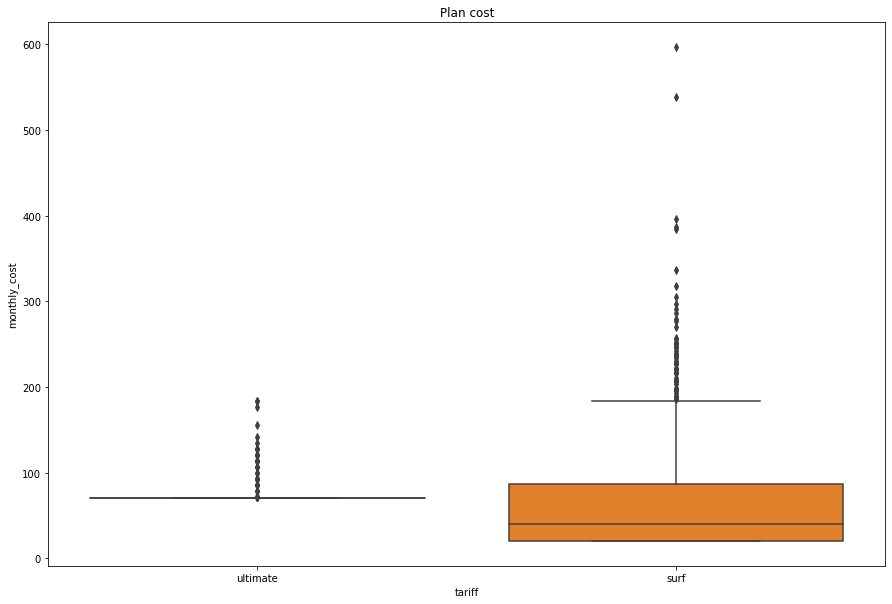

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(x='tariff' , y="monthly_cost",data=df_merged).set_title('Plan cost');

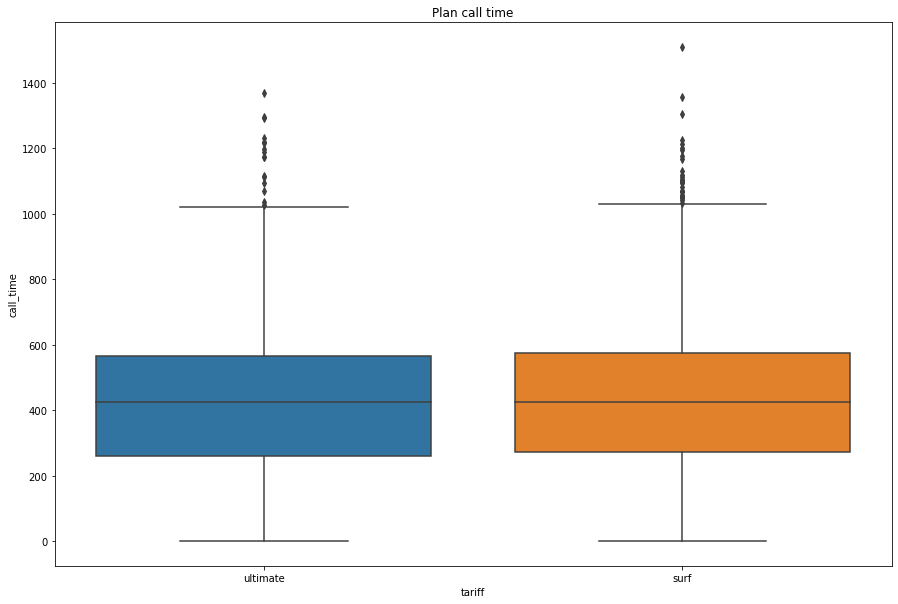

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x='tariff' , y="call_time",data=df_merged).set_title('Plan call time');

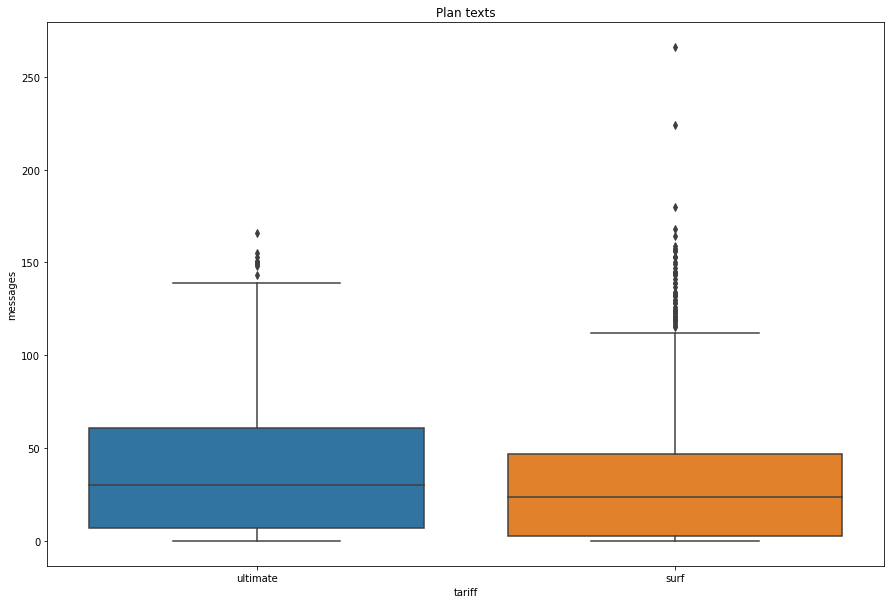

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x='tariff' , y="messages",data=df_merged).set_title('Plan texts');

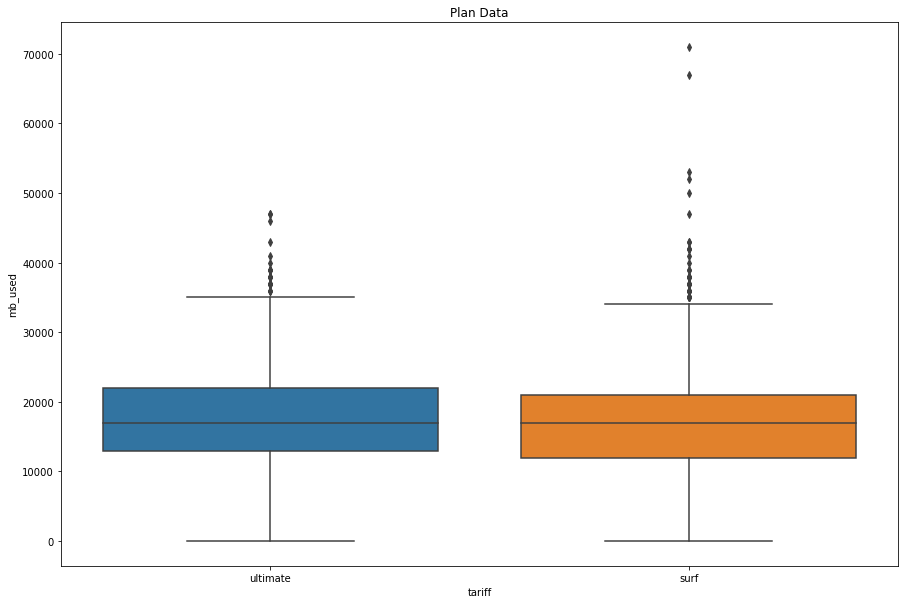

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x='tariff' , y="mb_used",data=df_merged).set_title('Plan Data');

In [25]:
df_merged.query('tariff == "surf"').describe()

,index,user_id,month,call_time,mb_used,messages,monthly_cost
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1135.405594,1242.755245,9.182454,428.749523,17037.507947,31.159568,61.437495
std,646.218507,139.227939,2.468199,234.453150,8016.394899,33.566717,56.374580
min,1.000000,1001.000000,1.000000,0.000000,0.000000,0.000000,20.000000
25%,566.000000,1120.000000,8.000000,272.000000,12000.000000,3.000000,20.000000
50%,1149.000000,1245.000000,10.000000,425.000000,17000.000000,24.000000,40.330000
75%,1659.000000,1358.000000,11.000000,576.000000,21000.000000,47.000000,86.400000
max,2302.000000,1499.000000,12.000000,1510.000000,71000.000000,266.000000,596.770000


In [26]:
df_merged.query('tariff == "ultimate"').describe()

,index,user_id,month,call_time,mb_used,messages,monthly_cost
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1183.088889,1253.330556,9.151389,430.450000,17719.444444,37.551389,72.380778
std,703.675250,150.915644,2.558495,240.508762,7865.288592,34.767179,11.687146
min,0.000000,1000.000000,1.000000,0.000000,0.000000,0.000000,70.000000
25%,595.750000,1126.000000,8.000000,260.000000,13000.000000,7.000000,70.000000
50%,1138.500000,1241.500000,10.000000,424.000000,17000.000000,30.000000,70.000000
75%,1874.250000,1401.000000,11.000000,565.250000,22000.000000,61.000000,70.000000
max,2287.000000,1497.000000,12.000000,1369.000000,47000.000000,166.000000,183.960000


<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

we can see straight away that the the mean and std are about the same, BUT we do need to take into consideration that theres values of "0" that affect those parameters as some users dont use those services.
its all visible that there are about twice the users for the surf plan then the ultimate plan.
The most surprising thing is that the surf plan has more outliers especially in the mb_used categorie, seems as the biggest profit is on people exceeding their plan limit and paying more at the total

In [27]:
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

,mean,std
month,,
1.0,203.000000,125.865007
2.0,297.000000,228.531179
3.0,330.000000,189.233622
4.0,351.540000,225.536567
5.0,399.584416,244.446763
6.0,431.298969,213.524304
7.0,449.983471,246.992105
8.0,410.111111,233.119381
9.0,414.226804,215.860971


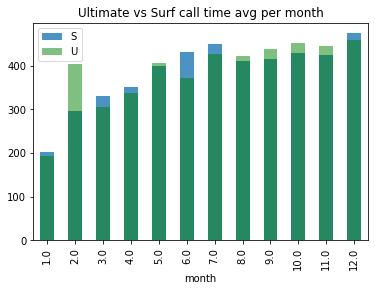

In [28]:
df_merged.query('tariff == "surf"').groupby('month')['call_time'].mean().plot(kind='bar', alpha=0.8)
df_merged.query('tariff == "ultimate"').groupby('month')['call_time'].mean().plot(kind='bar',alpha=0.5 ,color='green', title='Ultimate vs Surf call time avg per month')
plt.legend('SU')
display_side_by_side([df_merged.query('tariff == "surf"').groupby('month')['call_time'].describe()[['mean','std']],df_merged.query('tariff == "ultimate"').groupby('month')['call_time'].describe()[['mean','std']]],['Surf','Ultimate'])

,mean,std
month,,
1.0,10.500000,14.849242
2.0,12.000000,19.646883
3.0,15.260870,18.616262
4.0,17.400000,22.396246
5.0,24.012987,29.106652
6.0,25.298969,30.247646
7.0,27.033058,30.395979
8.0,28.777778,32.086064
9.0,30.762887,31.683268


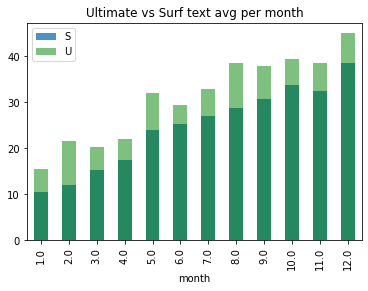

In [29]:
df_merged.query('tariff == "surf"').groupby('month')['messages'].mean().plot(kind='bar', alpha=0.8)
df_merged.query('tariff == "ultimate"').groupby('month')['messages'].mean().plot(kind='bar',alpha=0.5 ,color='green', title='Ultimate vs Surf text avg per month')
plt.legend('SU')
display_side_by_side([df_merged.query('tariff == "surf"').groupby('month')['messages'].describe()[['mean','std']],df_merged.query('tariff == "ultimate"').groupby('month')['messages'].describe()[['mean','std']]],['Surf','Ultimate']);

,mean,std
month,,
1.0,5000.000000,4242.640687
2.0,12666.666667,6652.067348
3.0,13782.608696,8218.363704
4.0,12420.000000,7688.024082
5.0,14454.545455,7856.518337
6.0,15762.886598,7021.949510
7.0,17297.520661,8049.476824
8.0,17253.086420,8650.072149
9.0,17072.164948,7165.327313


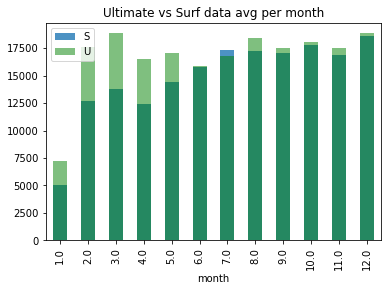

In [30]:
df_merged.query('tariff == "surf"').groupby('month')['mb_used'].mean().plot(kind='bar', alpha=0.8)
df_merged.query('tariff == "ultimate"').groupby('month')['mb_used'].mean().plot(kind='bar',alpha=0.5 ,color='green', title='Ultimate vs Surf data avg per month')
plt.legend('SU')
display_side_by_side([df_merged.query('tariff == "surf"').groupby('month')['mb_used'].describe()[['mean','std']],df_merged.query('tariff == "ultimate"').groupby('month')['mb_used'].describe()[['mean','std']]],['Surf','Ultimate']);

,mean,std
month,,
1.0,20.000000,0.000000
2.0,36.130000,21.277432
3.0,46.393478,39.829589
4.0,40.886600,35.520561
5.0,48.599610,45.797078
6.0,49.408247,45.025722
7.0,63.877355,55.404093
8.0,64.874383,60.916062
9.0,58.916856,48.565860


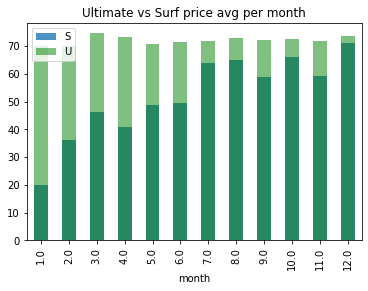

In [31]:
df_merged.query('tariff == "surf"').groupby('month')['monthly_cost'].mean().plot(kind='bar', alpha=0.8)
df_merged.query('tariff == "ultimate"').groupby('month')['monthly_cost'].mean().plot(kind='bar',alpha=0.5 ,color='green', title='Ultimate vs Surf price avg per month')
plt.legend('SU')
display_side_by_side([df_merged.query('tariff == "surf"').groupby('month')['monthly_cost'].describe()[['mean','std']],df_merged.query('tariff == "ultimate"').groupby('month')['monthly_cost'].describe()[['mean','std']]],['Surf','Ultimate']);

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

### Summary

<mark>As it seems almost all of the histomgrams have a positive skew, for call times it seems people start the year low and about the end of the year the numbers go up. mostly this applies also to text and data usage with small changes during the years months, this applies to both tariffs. <code style="background:#FF7F50;color:black">In conclusion, it seems that 'Ultimate' tariff users use more data and texts on average and calls are about the same. we can see that ultimate users use more of the services volume then surf user, probably due to high starting price and the feeling that they need and can use more <br></code>

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

<a id='section4'></a>
### Hypothesis testing

<code style="background:#eded9d;color:black">Now we will test the hypothesis:<br></code>
<code style="background:#00FFFF;color:black">The average profit from users of Ultimate and Surf calling tariffs differs.</code>
    
$$H_0 = Surf = Ultimate.$$
$$H_1 = Surf \neq Ultimate.$$


<code style="background:#eded9d;color:black">First we filter by tariff and group user id to montlhy profit and then sum them up to get user total price for time of use

In [32]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10,5
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [33]:
def plot_distribution(inp):
    warnings.filterwarnings("ignore")
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure;

In [34]:
surf = df_merged.query('tariff == "surf"')
ulti = df_merged.query('tariff == "ultimate"')
surf_cost = surf.groupby('user_id')['monthly_cost'].sum()
ulti_cost = ulti.groupby('user_id')['monthly_cost'].sum()

In [35]:
surf_cost.describe()

count     333.000000
mean      290.213754
std       294.204340
min        20.000000
25%        86.850000
50%       204.220000
75%       372.000000
max      1834.860000
Name: monthly_cost, dtype: float64

In [36]:
ulti_cost.describe()

count     157.000000
mean      331.937325
std       224.741740
min        70.000000
25%       140.000000
50%       280.000000
75%       490.000000
max      1312.640000
Name: monthly_cost, dtype: float64

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

Well plot a nice distribution chart

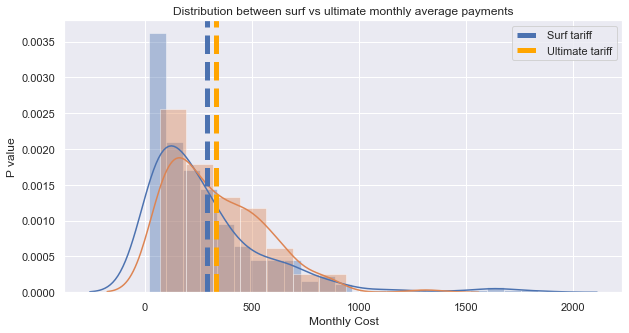

In [37]:
plt.figure()
ax1 = sns.distplot(surf_cost).set_title('Distribution between surf vs ultimate monthly average payments')
ax2 = sns.distplot(ulti_cost)
plt.axvline(np.mean(surf_cost), color='b', linestyle='dashed', linewidth=5, label='Surf tariff')
plt.axvline(np.mean(ulti_cost), color='orange', linestyle='dashed', linewidth=5,label='Ultimate tariff')
ax2.set(xlabel='Monthly Cost', ylabel='P value')
plt.legend();

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

Well use levene's test to see if the groups have equal variance

In [38]:
alpha = 0.05

results = st.levene(surf_cost, ulti_cost, center='mean')

print('p-value: ',results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.1706623204449221
We can't reject the null hypothesis


<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

Since we cant reject the null hypothesis well mark equal_var as True

In [39]:
alpha = 0.05

results = st.ttest_ind(surf_cost, ulti_cost, equal_var=True)

print('p-value: ',results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.11628228910323317
We can't reject the null hypothesis


<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

We cant reject that the average profit between the tariffs differ, so we assume that the tariffs are <code style="background:#FF7F50;color:black">different.</code>
We also can back this assumption by the description of the data which shows that the mean and std have difference between them.

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

<code style="background:#eded9d;color:black">Now we will test the hypothesis:<br></code>
<code style="background:#00FFFF;color:black">The average profit from users in NY-NJ area is different from that of the users from other regions.</code>

$$H_0 = NY-NJ = Else.$$
$$H_1 =  NY-NJ \neq Else. $$

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

we do the same and filter our choices

In [40]:
surf_area_nynj = df_merged.query('"New York-Newark-Jersey City, NY-NJ-PA MSA" in city and call_time != 0 and mb_used != 0 and messages != 0')
surf_area_else = df_merged.query('"New York-Newark-Jersey City, NY-NJ-PA MSA" not in city and call_time != 0 and mb_used != 0 and messages != 0')

In [41]:
surf_area_nynj.describe()

,index,user_id,month,call_time,mb_used,messages,monthly_cost
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,1005.507194,1214.694245,9.194245,455.201439,17334.532374,35.255396,58.676259
std,600.004962,128.725143,2.456488,205.748600,7294.696280,26.820090,39.506827
min,56.000000,1014.000000,2.000000,7.000000,1000.000000,1.000000,20.000000
25%,539.250000,1113.250000,8.000000,320.250000,13000.000000,13.000000,24.507500
50%,871.500000,1181.000000,10.000000,470.000000,17000.000000,31.000000,55.990000
75%,1391.750000,1299.000000,11.000000,586.000000,21000.000000,48.000000,70.000000
max,2277.000000,1494.000000,12.000000,1167.000000,39000.000000,126.000000,237.850000


In [42]:
surf_area_else.describe()

,index,user_id,month,call_time,mb_used,messages,monthly_cost
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,1171.994595,1250.543243,9.274324,443.029730,17333.783784,43.036486,65.922818
std,652.479056,140.489560,2.440173,245.682297,7773.723132,33.518848,46.284486
min,0.000000,1000.000000,1.000000,2.000000,1000.000000,1.000000,20.000000
25%,625.750000,1132.000000,8.000000,273.000000,13000.000000,18.000000,26.937500
50%,1193.500000,1252.000000,10.000000,426.500000,17000.000000,35.000000,70.000000
75%,1711.250000,1366.000000,11.000000,586.250000,21000.000000,61.000000,70.000000
max,2287.000000,1497.000000,12.000000,1510.000000,71000.000000,266.000000,596.770000


<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

Once again we plot a distribution chart.

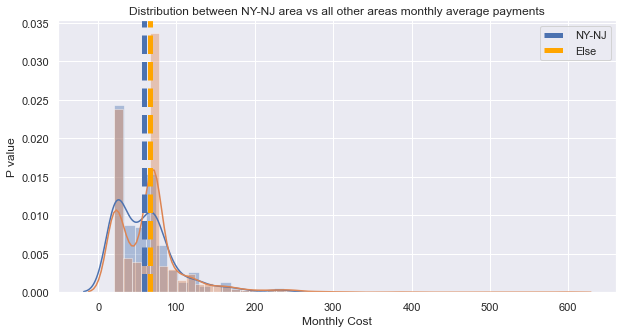

In [43]:
plt.figure()
ax1 = sns.distplot(surf_area_nynj['monthly_cost']).set_title('Distribution between NY-NJ area vs all other areas monthly average payments')
ax2 = sns.distplot(surf_area_else['monthly_cost'])
plt.axvline(np.mean(surf_area_nynj['monthly_cost']), color='b', linestyle='dashed', linewidth=5,label='NY-NJ')
plt.axvline(np.mean(surf_area_else['monthly_cost']), color='orange', linestyle='dashed', linewidth=5,label='Else')
ax2.set(xlabel='Monthly Cost', ylabel='P value')
plt.legend();

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

And check with levene's for equlity

In [44]:
results = st.levene(surf_area_nynj['monthly_cost'], surf_area_else['monthly_cost'], center='mean')

print('p-value: ',results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.9428981610183961
We can't reject the null hypothesis


<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

We cant reject that they are equal and the descriptions show similarity

In [45]:
alpha = 0.05

results = st.ttest_ind(surf_area_else['monthly_cost'], surf_area_nynj['monthly_cost'], equal_var=True)

print('p-value: ',results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.01445544426193266
We reject the null hypothesis


<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

Seems that we reject the null hypothesis regarding users from the NY-NJ area are equal and assume they <code style="background:#FF7F50;color:black">differ in profit from users from other regions.</code>

<div style="border:inset black 1px; border-radius: 5px; padding: 20px;background-image: url('https://us.123rf.com/450wm/chanoom19/chanoom192002/chanoom19200200075/140888165-abstract-dark-blue-with-line-background-modern-futuristic-wallpaper-solid-texture-deep-futuristic-ba.jpg?ver=6');color:white;font-size:16px">

<a id='section5'></a>
## Conclusion

<code style="background:#eded9d;color:black">To conclude the data and try and answer the question:</code><br>
<code style="background:#00FFFF;color:black">which prepaid tariff is more profitable.</code><br>
<code style="background:#eded9d;color:black">The first area is the number of users in each tariff, Ultimate has count of about 700 entries with an average of 70$ (as the tariff starts at that price), while Surf has about 1500 entries(twice of the number in Ultimate tariff) and a more wide range of payments (from 20$ as the entry price up to 600$).
users usual behaviour is lower at the start of the year with a increase as the months go by and extra high usage at the end of the year mostly near holiday season.
It seems theres  diffrence between the tariffs profit, and also same goes for area of usage. 'ultimate' tariff has a higher mean for profit and use of services then profit, surf has a high rate of exceeding the tariffs ceiling. regarding the area of use seems that other regions have a higher mean and std of profit comapred to NY-NJ area.
If we were to conclude which tariff is more profitable, the "ultimate" would be more profitable as the starting price is higher and same goes for the mean  comapred to the surf tariff.

<a href='#up'>GO UP</a>